In [3]:
import dimers_util
import dimers_analysis
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload 
import pickle
from scipy.optimize import curve_fit
import os
import time
reload(dimers_util)
reload(dimers_sim)
reload(dimers_analysis)

<module 'dimers_analysis' from 'C:\\Users\\ofira\\OneDrive\\מסמכים\\GitHub\\DymerKrylov\\dimers_analysis.py'>

In [268]:
exps = [ 'cluster2468_ic_experiment_L2200_t1500_d[60]____2023_01_27__13_46.pickle',
         'cluster1204_ic_experiment_L1900_t1500_d[60]____2023_01_27__08_13.pickle',
         'cluster9116_ic_experiment_L1700_t1500_d[60]____2023_01_27__00_43.pickle',
         'cluster3671_ic_experiment_L1500_t1500_d[60]____2023_01_27__01_54.pickle',
         'cluster3795_ic_experiment_L1300_t1500_d[60]____2023_01_26__22_27.pickle',
         'd_ic_experiment_L300_t1500_d[60]____2023_01_26__15_06.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        exp_files.append(pickle.load(f))
file_name= "Long_time_experiment1"
experiment = dimers_sim.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

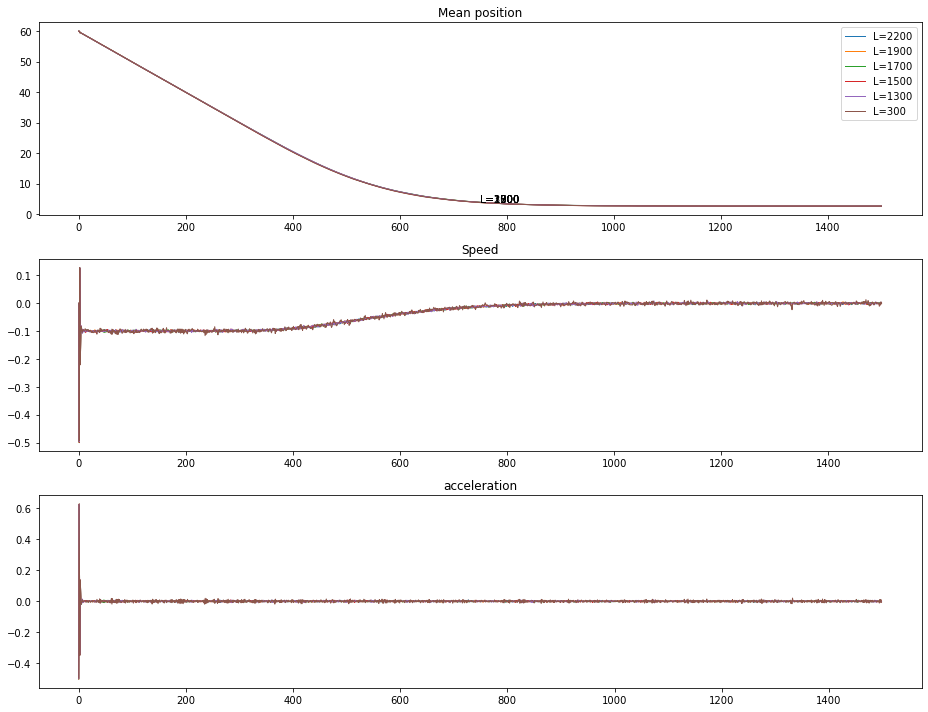

In [269]:
dimers_analysis.plot_analyses(experiment.results, label='L')

In [250]:
def plot_average_dynamics(experiment, label, win=10, ti=0):
    x_t = {}
    v_t = {}
    a_t = {}
    for ana in experiment.results:
        t = ana.times
        x = np.array([np.mean(ana.analysis['Mean'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        x_t[getattr(ana, label)] = x
        #v = np.array([np.mean(ana.analysis['speed'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        v = x[1:] - x[:-1]
        v_t[getattr(ana, label)] = v
        #a = np.array([np.mean(ana.analysis['acc'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        a_t[getattr(ana, label)] = v[1:] - v[:-1]
        
    plt.figure(1, figsize=(10,8))
    plt.subplot(211)
    for k in v_t:
        plt.plot(v_t[k], label=str(k))
    plt.title('speed')
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.subplot(212)
    for k in a_t:
        plt.plot(a_t[k], label=str(k))
    plt.title("acceleration")
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.show()
    
    return v_t, a_t

In [14]:
def plot_fit(ana, times,f, label, p0=None):
    ana_times = (ana.times*times).astype(np.int32)
    plt.figure(1, figsize=(8,16))
    for i, t in enumerate(zip(times, ana_times)):
        plt.subplot(100*len(times) + 10 +i+1)
        popt_t, pcov_t, x_max, x_min = dimers_analysis.dist_fit(ana, f, t[1], p0)
        xrange = np.arange(x_min, x_max)
        y = ana.rho[t[1],x_min:x_max]
        plt.plot(xrange, y, label="Simulation L={}".format(str(ana.L)))
        plt.plot(xrange, f(xrange, *popt_t),label="{} L={}".format(label, str(ana.L)))
        plt.title("t={}".format(t[0]))
        plt.legend()
    plt.tight_layout()
    plt.show()

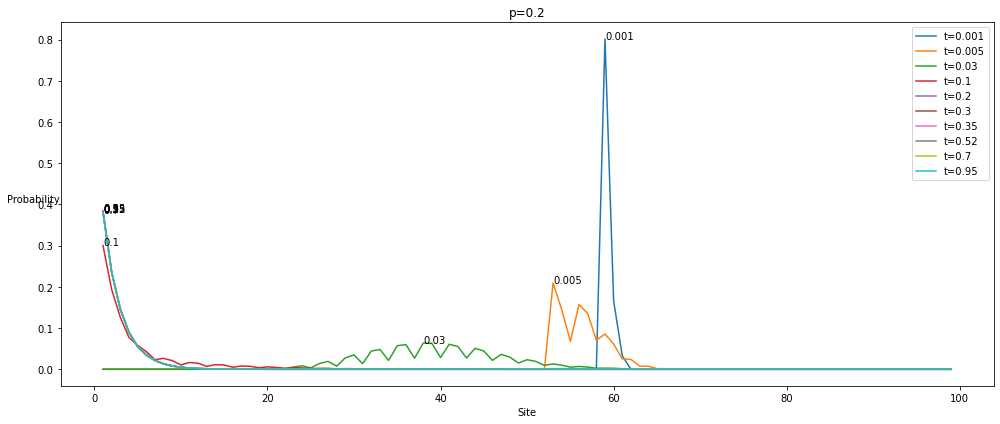

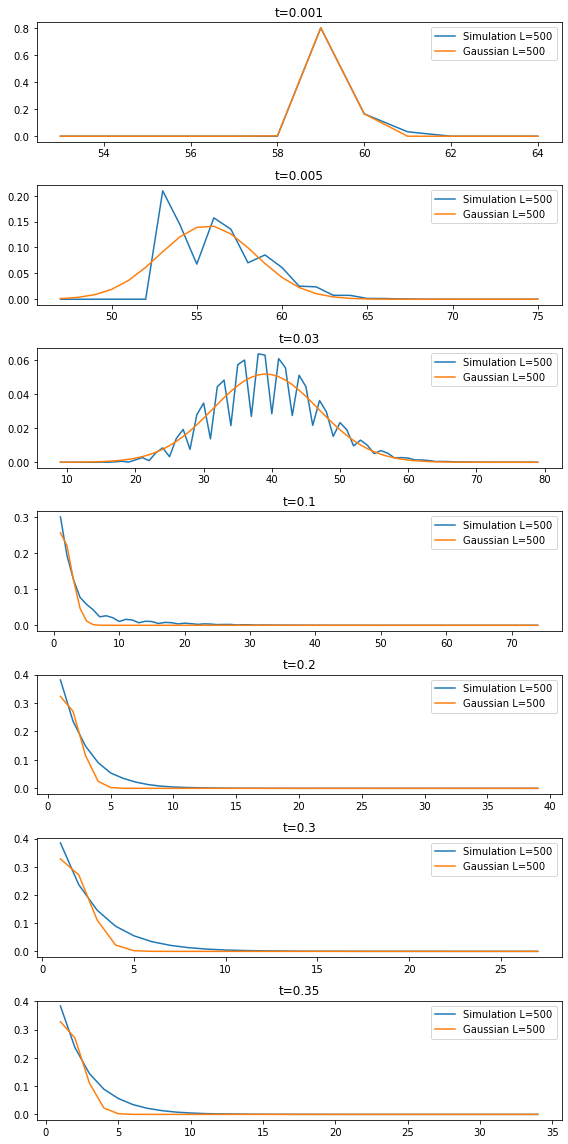

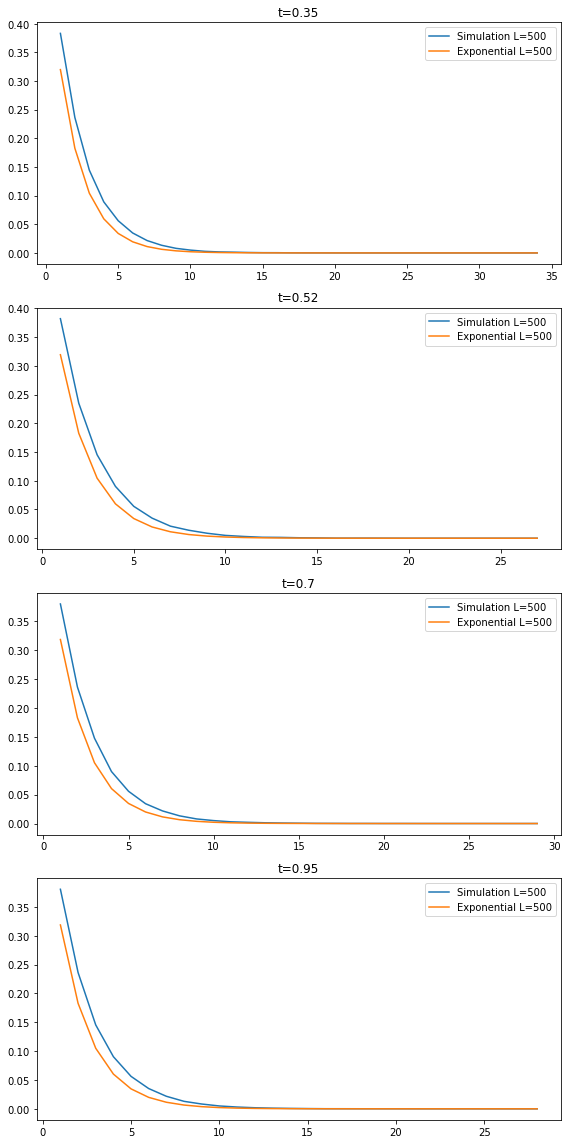

In [23]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[5]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=100)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

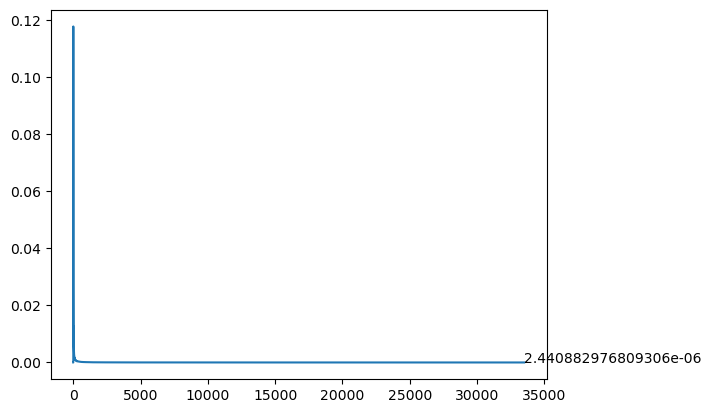

KeyboardInterrupt: 

In [125]:
dimers_util.check_detailed_balance(50, 100000, 18, interval=500)

In [126]:
p = [0.0001, 0.0003, 0.0006, 0.001,  0.01, 0.2, 0.7]
exps = ['d_ic_experiment_L40_t600_d[30]_p0.0001____2023_02_15__12_43.pickle']
exp_files = []
for _p, path in zip(p, exps):
    with open("analyses/varying_p/"+path, 'rb') as f:
        a = pickle.load(f)
        a.results[0].analysis['p'] = _p
        exp_files.append(a)
file_name= "varying_p_test"
experiment = dimers_analysis.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

FileNotFoundError: [Errno 2] No such file or directory: 'analyses/varying_p/d_ic_experiment_L40_t600_d[30]_p0.0001____2023_02_15__12_43.pickle'

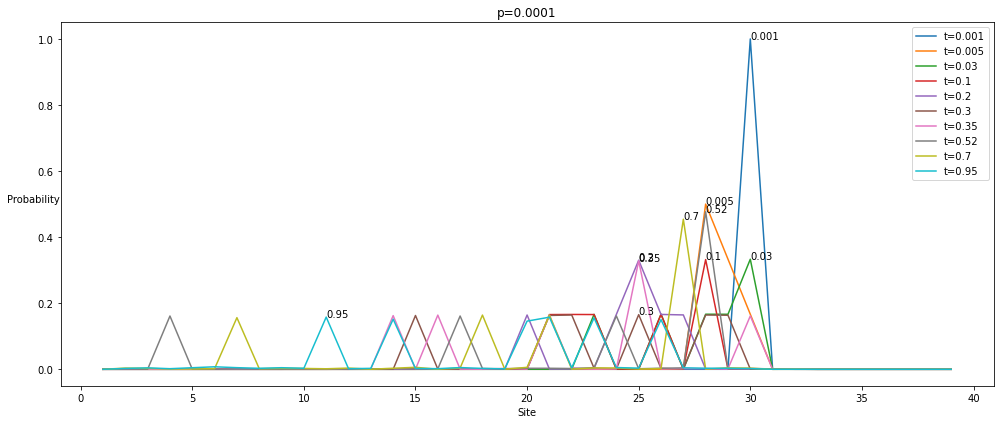

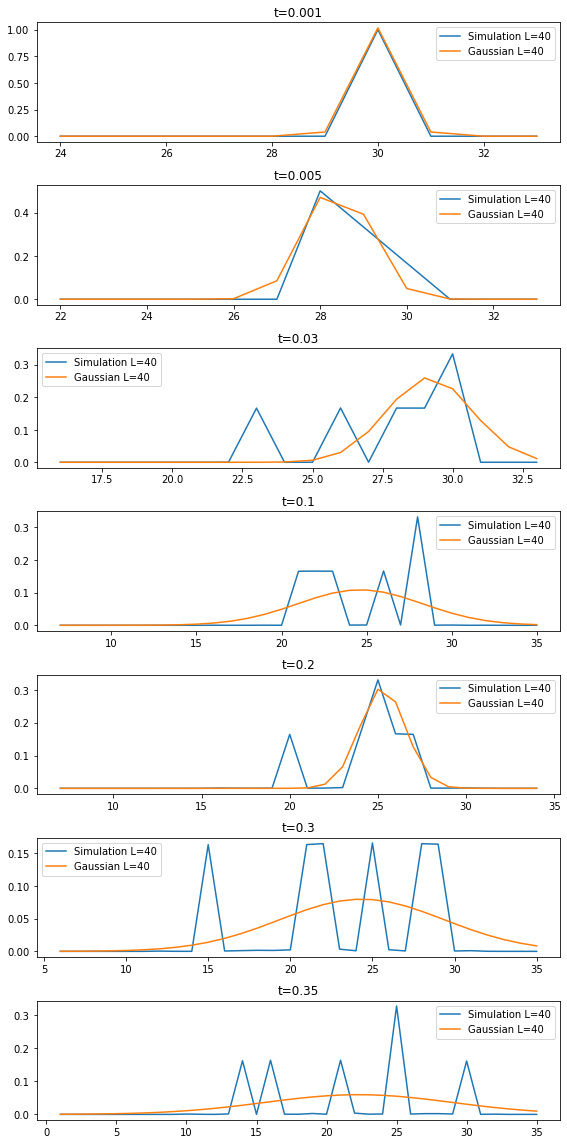

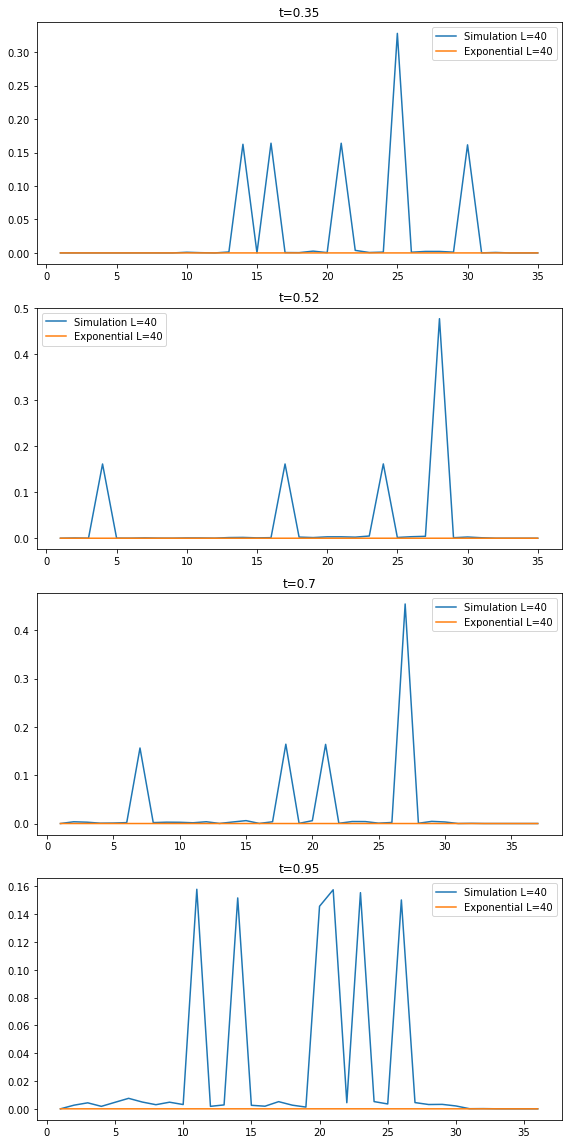

In [29]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[0]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=40)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

In [127]:
exps = ['d_ic_experiment_L50_t600_d[30]____2023_02_21__13_47.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        experiment = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'analyses/varying_initial_conditions/d_ic_experiment_L50_t600_d[30]____2023_02_21__13_47.pickle'

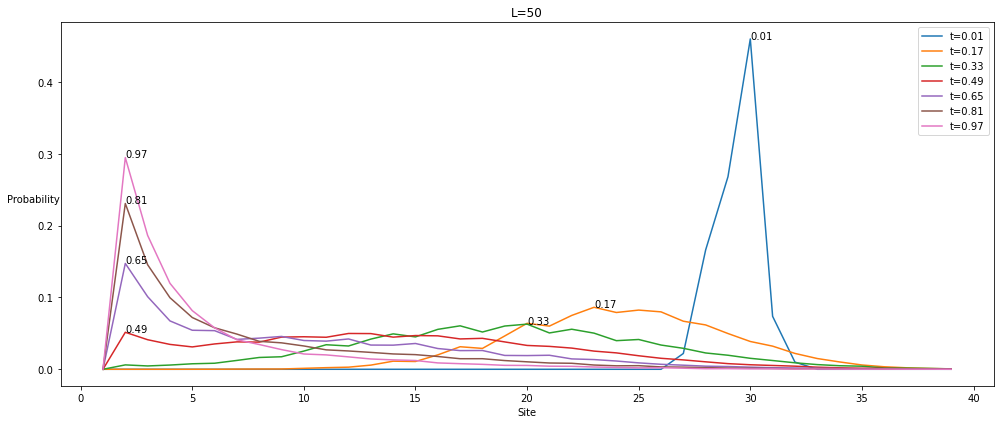

In [44]:
times = np.arange(0.01, 1, step=0.16)
ana = experiment.results[0]

ana_times = (ana.times*times//10).astype(np.int32)
dimers_analysis.plot_dist(ana, times, title="L={}".format(ana.analysis['L']), site_max=40)

In [ ]:
print("fsdds")

In [ ]:
L_sim = 50
times_sim = 500
d_sim = 30
batch_size = 2000
simulator = dimers_sim.Simulator(L=L_sim, times=times_sim, d=d_sim, batch=batch_size, batch_procs_num = 5)
results = simulator.simulate() 
title = "Evolution for varying batch size - L={}, # times={}, d={}".format(L_sim, times_sim, d_sim)    
dimers_analysis.plot_analyses([results],label = 'batch', title=title)

Starting id: 2840, L =  50, # times = 500, d = 30, #batch = 2000 , # of batches = 5 | 2023_02_23__16_55


In [ ]:
times = np.arange(0.01, 1, step=0.16)
ana = results[0]
for ana in [results]:
    ana_times = (ana.times*times//10).astype(np.int32)
    dimers_analysis.plot_dist(ana, times, title="L={}, b={}".format(ana.analysis['L'], ana.batch), site_max=35)

In [ ]:
L_sim = [60, 90, 120]
times_sim = 200
d_sim = 50
batch_size = 20000
simulators = [dimers_sim.Simulator(L=L, times=times_sim, d=d_sim, batch=batch_size, batch_procs_num = 5) for L in L_sim]
results = [simulator.simulate() for simulator in simulators]
title = "Evolution for varying batch size - L={}, # times={}, d={}".format(L_sim, times_sim, d_sim)    
dimers_analysis.plot_analyses(results,label = 'batch', title=title)